In [38]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [39]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree   import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate
)
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_score,
    accuracy_score,
    recall_score
)
warnings.filterwarnings('ignore')

### 1. Loading Data

In [40]:
X_train = np.load('Artifacts/X_train.npz')['arr_0']
Y_train = np.load('Artifacts/Y_train.npz')['arr_0']
X_test = np.load('Artifacts/X_test.npz')['arr_0']
Y_test = np.load('Artifacts/Y_test.npz')['arr_0']

### 2. Define Multi Model

In [41]:
models ={
    'logistic_regression': LogisticRegression(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'xgboost' : XGBClassifier(
    n_estimators=200,      # number of trees
    max_depth=4,           # tree depth
    learning_rate=0.1,     # step size shrinkage
    subsample=0.8,         # fraction of samples per tree
    colsample_bytree=0.8,  # fraction of features per tree
    random_state=42
)

    
}

### 2. Configure K-Fold CV

In [42]:
cv = StratifiedKFold(
    n_splits=6,
    random_state=42,
    shuffle=True

)

In [43]:
trained_models = {}
for model_name, model in models.items():
    print(f"\nCross Validation: {model_name}")

    cv_results = cross_validate(
        model,
        X_train,
        Y_train,
        cv=cv, scoring='f1',
        return_estimator=True,
        return_train_score=False

    )
    test_scores = cv_results['test_score']
    best_index = np.argmax(test_scores)

    estimator = cv_results['estimator'][best_index]
    trained_models[model_name] = estimator


Cross Validation: logistic_regression

Cross Validation: decision_tree

Cross Validation: random_forest

Cross Validation: xgboost


In [44]:
Y_hat_tests={}
for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test
Y_hat_tests

{'logistic_regression': array([1, 0, 0, ..., 0, 0, 1]),
 'decision_tree': array([1, 0, 0, ..., 0, 0, 0]),
 'random_forest': array([1, 0, 0, ..., 0, 0, 0]),
 'xgboost': array([1, 0, 0, ..., 0, 0, 1])}

In [45]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['logistic_regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['decision_tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['random_forest'])
cm4 = confusion_matrix(Y_test, Y_hat_tests['xgboost'])

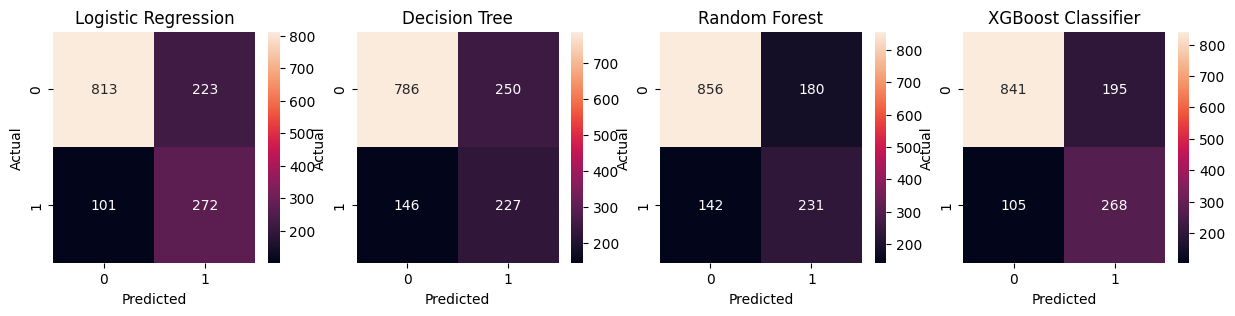

In [46]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(15,3))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Logistic Regression')


sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Decision Tree')


sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')
ax3.set_title('Random Forest')

sns.heatmap(cm4, annot=True, fmt='d', ax=ax4)
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')
ax4.set_title('XGBoost Classifier')

plt.show()
